In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import os
import yaml
import re

How to do with natively in linkml?

Some rough notes I took in discussion with Harold:

----

yaml_loader.load linkml runtime repo (schema_name, SchemaDefinition

vs rawloader?

schema.imports

In [2]:
# os.getcwd()

In [3]:
# should really exclude directories
# and only allow files that end in .yaml
schema_files_prefix = "../../src/schema/"
schema_files = os.listdir(schema_files_prefix)
# schema_files

In [4]:
df_list = []
for current_basename in schema_files:
    current_file = schema_files_prefix + current_basename
    no_ext = re.sub("\\.yaml$", "", current_basename)

    with open(current_file) as f:
        current_per_file_model = yaml.safe_load(f)
        if "imports" in current_per_file_model:
            current_imports = current_per_file_model["imports"]

            import_count = len(current_imports)
            file_col = [no_ext] * import_count

            d = {"importer": file_col, "importee": current_imports}
            df = pd.DataFrame(d)

            df_list.append(df)
imports_frame = pd.concat(df_list)

# imports_frame

In [5]:
G = nx.from_pandas_edgelist(
    imports_frame,
    source="importer",
    target="importee",
    create_using=nx.DiGraph(),
)

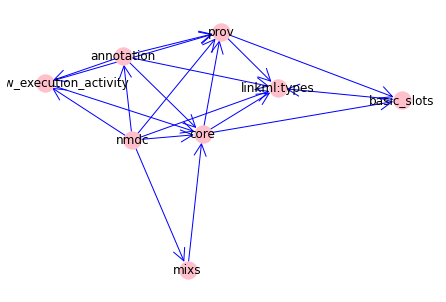

In [6]:
nx.draw(
    G,
    with_labels=True,
    node_color="pink",
    arrowsize=30,
    #     arrowstyle="fancy",
    arrowstyle="->",
    edge_color="b",
)